step1: Prepare environment & import libraries

In [6]:
# ------------------------------
# 1) SETUP & IMPORTS
# ------------------------------
# Install any missing packages before running:
# pip install pandas scikit-learn joblib shap fastapi uvicorn

import pandas as pd
import numpy as np
import joblib

# sklearn imports
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

# for reproducibility
RND = 42


step2: Load data
> Add blockquote



In [8]:
# ------------------------------
# 2) LOAD DATA & BASIC INSPECTION
# ------------------------------
# Replace 'cleaned_dataset_Thyroid1.csv' with your actual file path.
df = pd.read_csv('cleaned_dataset_Thyroid1.csv')

In [9]:
# ------------------------------
# STEP 3: SPLIT FEATURES & LABEL
# ------------------------------
X = df.drop(columns=['binaryClass'])
y = df['binaryClass']

print("Feature shape:", X.shape)
print("Label distribution:\n", y.value_counts(normalize=True))


Feature shape: (3771, 25)
Label distribution:
 binaryClass
0    0.922832
1    0.077168
Name: proportion, dtype: float64


In [10]:
# ------------------------------
# STEP 4: TRAIN/TEST SPLIT
# ------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (3016, 25)  Test: (755, 25)


In [11]:
# ------------------------------
# STEP 5: PREPROCESSING + PIPELINE
# ------------------------------

# Identify numeric vs binary/categorical
num_features = ['age','TSH','TT4','T4U','FTI']
bin_features = [c for c in X.columns if c not in num_features]

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

# Preprocessor
preproc = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('bin', 'passthrough', bin_features)
])

# Full pipeline with classifier
pipeline = Pipeline([
    ('prep', preproc),
    ('clf', RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42))
])


In [12]:
# ------------------------------
# STEP 6:------------------------
pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'TSH', 'TT4', 'T4U',
                                                   'FTI']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'on thyroxine',
                                                   'query on thyroxine',
                                                   'on antithyroid medication',
                                                   'sick', 'pregnant',
                                                   'thyroid surgery',
                                                   'I131 treatment',
                                                   'query hypothyroid',
                                                   'query hyperthyroid',
                                                   'lithium', 'goitre', 'tumor',
                                                   'hypopituitary', 'psych',
                                                   'TSH measured',
                                                   'T3 measured',
                                                   'TT4 measured',
                                                   'T4U measured',
                                                   'FTI measured'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [13]:
# ------------------------------
# STEP 7: EVALUATION
# ------------------------------
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9971    0.9986       697
           1     0.9667    1.0000    0.9831        58

    accuracy                         0.9974       755
   macro avg     0.9833    0.9986    0.9908       755
weighted avg     0.9974    0.9974    0.9974       755

Confusion Matrix:
[[695   2]
 [  0  58]]


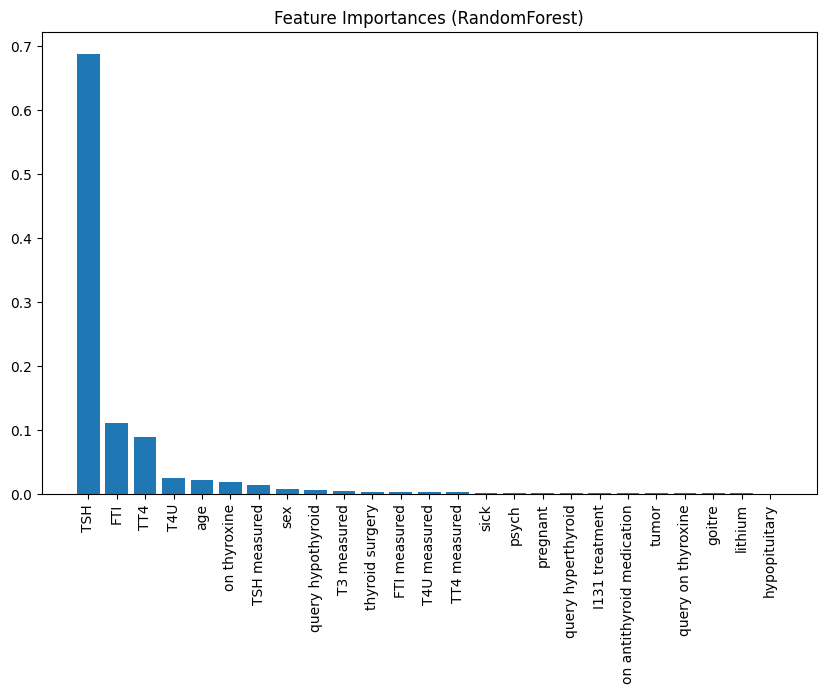

In [14]:
# ------------------------------
# STEP 8: FEATURE IMPORTANCES
# ------------------------------
import matplotlib.pyplot as plt

clf = pipeline.named_steps['clf']
importances = clf.feature_importances_

# Get feature names after preprocessing
feature_names = num_features + bin_features

idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[idx])
plt.xticks(range(len(importances)), np.array(feature_names)[idx], rotation=90)
plt.title("Feature Importances (RandomForest)")
plt.show()

giving model sample

In [16]:
import pandas as pd

sample = pd.DataFrame([{
    'age': 25,
    'sex': 0,
    'TSH': 1.58,
    'TT4': 82.56,
    'T4U': 0.9,
    'FTI': 120,
    'on thyroxine': 0,
    'query on thyroxine': 0,
    'on antithyroid medication': 0,
    'sick': 0,
    'pregnant': 0,
    'thyroid surgery': 0,
    'I131 treatment': 0,
    'query hypothyroid': 0,
    'query hyperthyroid': 0,
    'lithium': 0,
    'goitre': 0,
    'tumor': 0,
    'hypopituitary': 0,
    'psych': 0,
    'TSH measured': 1,
    'T3 measured': 0,
    'TT4 measured': 1,
    'T4U measured': 1,
    'FTI measured': 1
}])


pred = pipeline.predict(sample)
proba = pipeline.predict_proba(sample)

print("Predicted class:", pred[0])
print("Probabilities:", proba[0])

Predicted class: 0
Probabilities: [1. 0.]


Error percentage

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9973509933774835
